## Exercise 3

Load in the data "energySoftware.csv" and answer the following questions:
1. Plot the distribution of CPU for each test type
2. Is there a difference in the CPU between bubblesort and bubblesort_ll? (note that the last name contains two small l's and not two capital i's) Justify your choice of test(s). 
3. Is there a difference in the CPU between bubblesort_func and bubblesort_ll2? Justify your choice of test(s). If there is a difference, how big is it?
4. When it comes to time, is there a difference between bubblesort and bubblesort_ll? Justify your choice of test(s).
5. Perform an ANOVA test to test if there is a difference in means across groups for CPU
6. Perform an ANOVA test to test if there is a difference in means across groups for time

In [1]:
#Import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#Load data
energy = pd.read_csv("Datasets/energySoftware.csv")
energy.head()

,test,PKG,CPU,nn,nn2,time
0,bubblesort,0.010986,0.009155,,,3.165
1,bubblesort,0.013184,0.010925,,,3.069
2,bubblesort,0.015198,0.009399,,,2.617
3,bubblesort,0.010559,0.009583,,,2.572
4,bubblesort,0.009949,0.009949,,,2.671


In [3]:
#Basic EDA
print(energy.info())
print("Descriptive Statistics\n",energy.describe())
print(f"Missing Values {energy.isnull().sum().values}")
print("Duplicates:",energy.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   test    1441 non-null   object 
 1   PKG     1441 non-null   float64
 2   CPU     1441 non-null   float64
 3   nn      1441 non-null   object 
 4   nn2     1441 non-null   object 
 5   time    1441 non-null   float64
dtypes: float64(3), object(3)
memory usage: 67.7+ KB
None
Descriptive Statistics
                PKG          CPU         time
count  1441.000000  1441.000000  1441.000000
mean      0.017618     0.015021     3.009384
std       0.004464     0.003192     0.571439
min       0.008179     0.007812     1.962000
25%       0.013733     0.012939     2.462000
50%       0.017761     0.015747     3.363000
75%       0.020874     0.017822     3.524000
max       0.026794     0.020325     4.244000
Missing Values [0 0 0 0 0 0]
Duplicates: 0


From a basic EDA we dont find any obvious missing values or duplicates. Though it strange is the case of features "nn" and "nn2" because it does not appear to have values but the EDA showed that they are not missing.

In [4]:
energy[["nn", "nn2"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nn      1441 non-null   object
 1   nn2     1441 non-null   object
dtypes: object(2)
memory usage: 22.6+ KB


Further exploring these two features it seems that they are spaces. So we are droping them so that they dont affect our analysis.

In [5]:
#Drop space values
energy.drop(columns=["nn", "nn2"], inplace=True)
#Verify that the dataset doesnt include them anymore
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   test    1441 non-null   object 
 1   PKG     1441 non-null   float64
 2   CPU     1441 non-null   float64
 3   time    1441 non-null   float64
dtypes: float64(3), object(1)
memory usage: 45.2+ KB


## 1.Distribution of CPU energy for each type.

In [9]:
#CPU descriptive statistics
energy["CPU"].describe()

count    1441.000000
mean        0.015021
std         0.003192
min         0.007812
25%         0.012939
50%         0.015747
75%         0.017822
max         0.020325
Name: CPU, dtype: float64

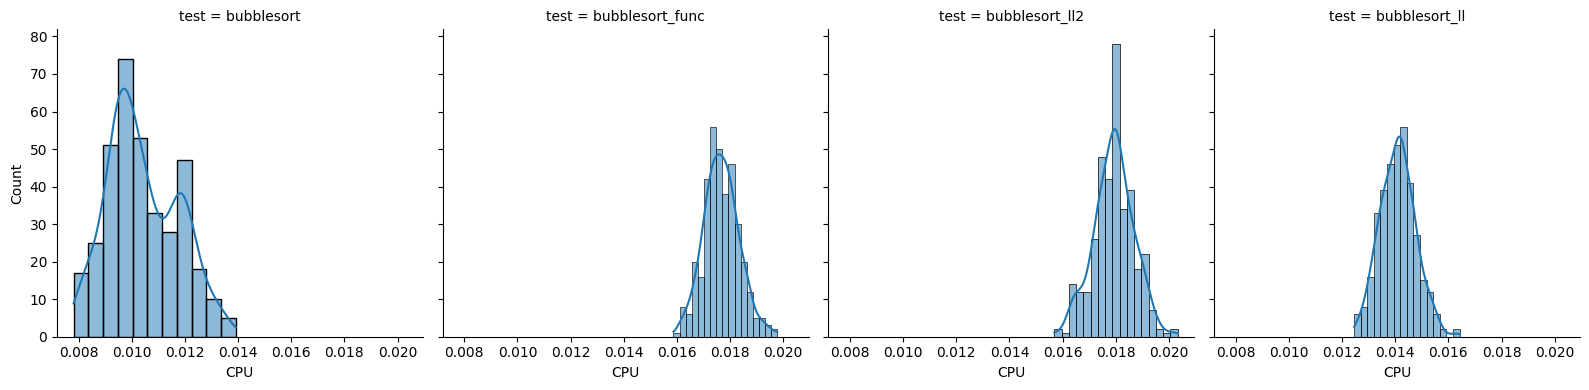

In [8]:
#CPU distribution 
g = sns.FacetGrid(energy, col="test", height=4)
g.map(sns.histplot, "CPU", kde=True)

The distribution of a variable is how the individual values of the variable distribute themselves. In other words, how often the Variable appears in our dataset.

([0, 1, 2, 3],
 [Text(0, 0, 'bubblesort'),
  Text(1, 0, 'bubblesort_func'),
  Text(2, 0, 'bubblesort_ll2'),
  Text(3, 0, 'bubblesort_ll')])

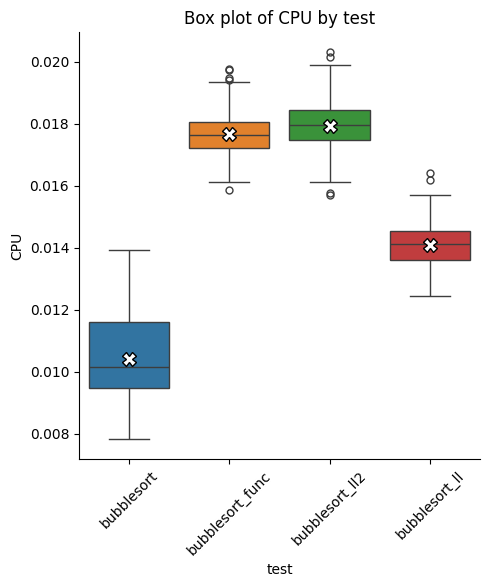

In [11]:
#Box plots for the test
#Box plot for the two test
sns.catplot(x="test", y="CPU", hue="test", data=energy, kind="box", 
            showmeans = True,
            meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})
plt.title("Box plot of CPU by test")
plt.xticks(rotation=45)

## 2. Difference in the CPU between bubblesort and bubblesort_II

From the plot we can clearly see that there is difference but the case may vary. More scientif way of proving if there is difference is to apply hypotheis testing through statistical tests. 

Since we are intrested if there is difference in the CPU between bubblesort and bubblesor_II the null hypotheis is that there is no difference between them. Hence, we are trying to reject the null hypothesis in order to find out if there is difference.

In order to define the correct statistical test we have to define the following:
1. The type of the data is numerical 
2. bubblesort variable is not normally distributed and bubblesort_II is somewhat normally distributed, hence we are counting it as not normally distributed.
3. The data is not paired
4. And the groups doesnt have the same shape of distribution.

Taking all the above into consideration we are going to perform a Mann-Whitnery U test from stats library.
Worth mentioning that the significance level is the commonly used level of 0.05.

In [12]:
#Matt Whitney U test
stats.mannwhitneyu(energy[energy["test"]=="bubblesort"]["CPU"], energy[energy["test"]=="bubblesort_ll"]["CPU"])

MannwhitneyuResult(statistic=np.float64(645.5), pvalue=np.float64(3.79156286604797e-117))

Since the pvalue is really close to zero, we reject the null hypothesis and we accept the alternative, that there is difference in the CPU between the two test. As a mater of fact the evidence is strong indicating a difference.

## 3.Difference in the CPU between bubblesort_func and bubblesort_ll2

1. The data is numerical 
2. They are both pretty close to normally distributed.
3. The size of the sample is medium/large (more than 30 obeservations)
4. The data is not paired

Hence we are goint to perform a Studetn t-test

In [13]:
#TTest
stats.ttest_ind(energy[energy["test"]=="bubblesort_func"]["CPU"], energy[energy["test"]=="bubblesort_ll2"]["CPU"])

TtestResult(statistic=np.float64(-4.692273179928857), pvalue=np.float64(3.2355729348933066e-06), df=np.float64(718.0))

Null hypothesis is that there is no difference. Though, we find out that pvalue is once again very close to zero, below 0.05, so we reject the null hypothesis and accept the alternative, being there is difference in the CPU between the two variables.

The difference is -4.7 approximately, with the negative sign indicating that the mean of bubblesorf_func is smaller than the mean of bubblesort_ll2.

## 4.Difference in Time between bubblesort and bubblesort_ll

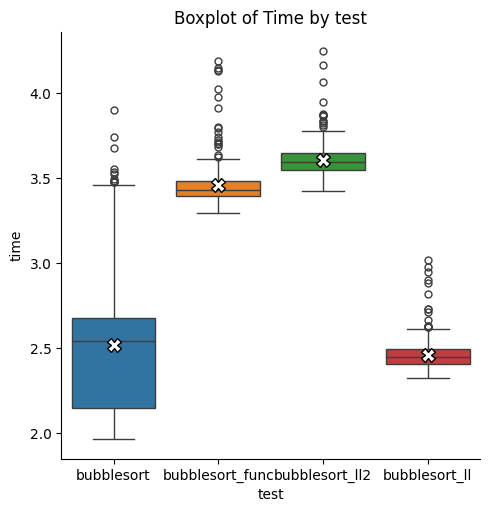

In [15]:
#Visualize test by time.
sns.catplot(x="test", y = "time", hue = "test", data = energy, kind="box",
            showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})
plt.title("Boxplot of Time by test")
plt.show()

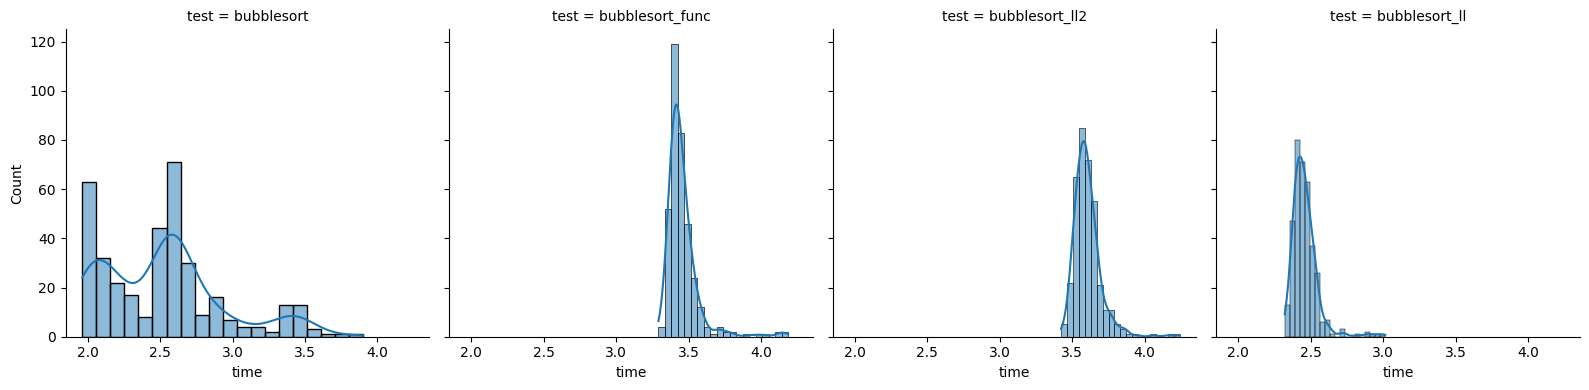

In [19]:
#Distribution of time by test
g=sns.FacetGrid(energy, col="test", height = 4)
g.map(sns.histplot, "time", kde=True, bins=20)

The null hypothesis is that there is no difference between the two test and from the plot we can cleary distinguish the means.
So:
1. The variables are numerical 
2. They are not normally distributed
3. They are not paired
4. They dont have the same shape of distribution
Hence we are performing Man Whitney U Test.

In [20]:
#Mann-Whitney
stats.mannwhitneyu(energy[energy["test"]=="bubblesort_func"]["time"], energy[energy["test"]=="bubblesort_ll2"]["time"])

MannwhitneyuResult(statistic=np.float64(11015.5), pvalue=np.float64(8.834883020803327e-83))

The pvalue is below 0.05 hence we reject the null hypothesis and we accept the alternative, that there is difference in Time between the two tests(bubblesort and bubblesort_ll)

## 5.Perform an ANOVA test to test if there is a difference in means across groups for CPU


In [21]:
#Descriptive statistics
energy.groupby("test")["CPU"].describe()

,count,mean,std,min,25%,50%,75%,max
test,,,,,,,,
bubblesort,361.0,0.010412,0.001316,0.007812,0.009460,0.010132,0.011597,0.013916
bubblesort_func,360.0,0.017669,0.000663,0.015869,0.017212,0.017639,0.018066,0.019775
bubblesort_ll,360.0,0.014097,0.000662,0.012451,0.013611,0.014099,0.014526,0.016418
bubblesort_ll2,360.0,0.017919,0.000763,0.015686,0.017456,0.017944,0.018433,0.020325


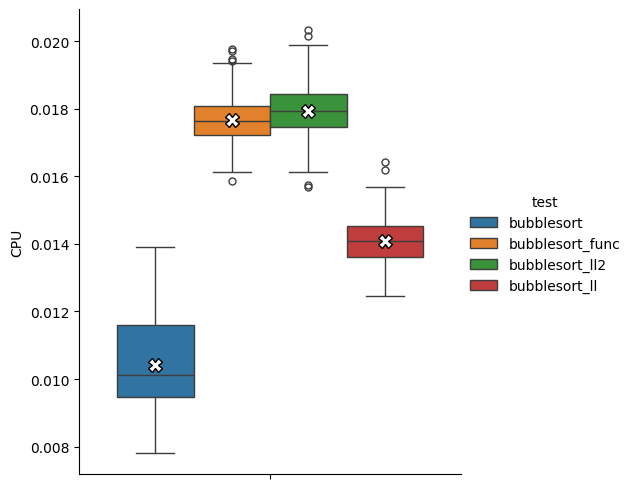

In [22]:
#Visualize
sns.catplot(y="CPU", hue = "test", data = energy, kind="box", height = 5,
            showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})
plt.show()

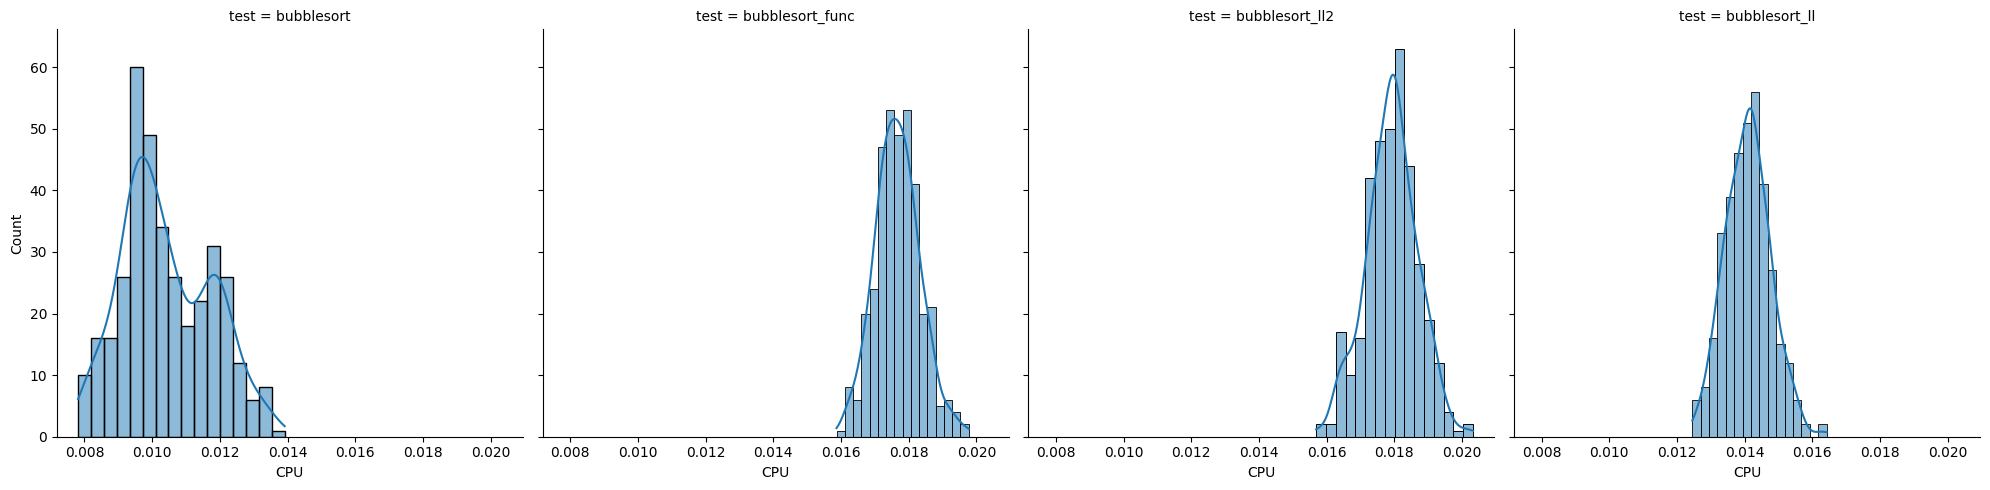

In [23]:
g=sns.FacetGrid(energy, col="test", height = 5)
g.map(sns.histplot, "CPU", bins = 16, kde=True)
plt.show()

The distribution of the variables is somewhat normal for bubblesort and pretty close to normal for the rest test. Even though they follow normal distribution we cannot use Studetn t test becasue there are more than two  variables.
We are going to use ANOVA test instead. We care only to see if there is at least one difference accross means and not which particular groups, so we are using oneway anova test. 



In [24]:
#ANNOVA Test
stats.f_oneway(energy[energy["test"]=="bubblesort"]["CPU"], 
               energy[energy["test"]=="bubblesort_func"]["CPU"],
               energy[energy["test"]=="bubblesort_ll2"]["CPU"],
               energy[energy["test"]=="bubblesort_ll"]["CPU"] )

F_onewayResult(statistic=np.float64(5641.93769602928), pvalue=np.float64(0.0))

The pvalue is practically 0, so there is strong evidence that there is a difference in the means and thats why we reject the null hypothesis and accepting the alternative, there is difference in means across groups for CPU.

## 6.Perform an ANOVA test to test if there is a difference in means across groups for time

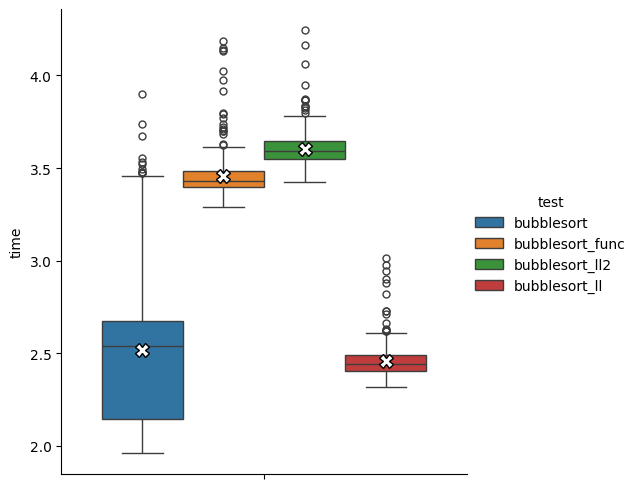

In [25]:
#Visualize
sns.catplot(y="time", hue = "test", data = energy, kind="box", height = 5,
            showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})
plt.show()

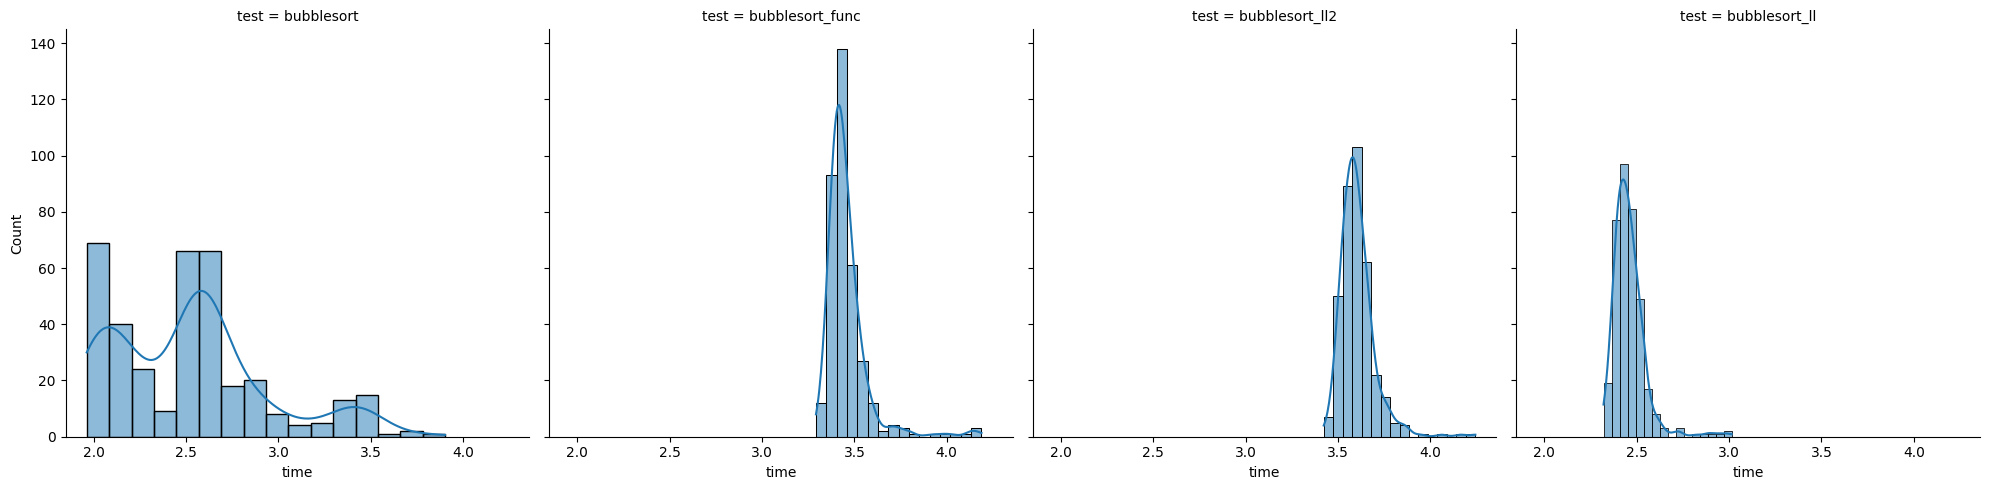

In [26]:
g=sns.FacetGrid(energy, col="test", height = 5)
g.map(sns.histplot, "time", bins = 16, kde=True)
plt.show()

In [27]:
stats.f_oneway(energy[energy["test"]=="bubblesort"]["time"], 
               energy[energy["test"]=="bubblesort_func"]["time"],
               energy[energy["test"]=="bubblesort_ll2"]["time"],
               energy[energy["test"]=="bubblesort_ll"]["time"] )

F_onewayResult(statistic=np.float64(2556.332935412784), pvalue=np.float64(0.0))

pvalue is 0 < 0.05 therefore we accept the alternative hypothesis that there is difference in means across groups for time.